# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_of_mice = len(merged_data['Mouse ID'].unique())
number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data.loc[merged_data.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = merged_data.loc[(merged_data['Mouse ID'] == 'g989'),:]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicate)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
updated_number_of_mice = len(clean_df['Mouse ID'].unique())
updated_number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_var =  clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_std_err = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_volume_stats_summary = pd.DataFrame({"Mean": tumor_volume_mean, "Median": tumor_volume_median, "Variance": tumor_volume_var, "Standard Deviation": tumor_volume_std, "SEM":tumor_volume_std_err})
tumor_volume_stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation =  clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

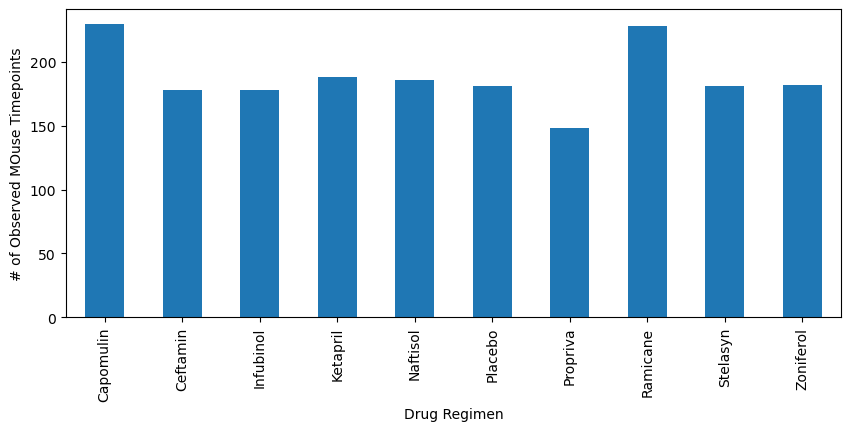

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = clean_df.groupby('Drug Regimen')['Timepoint'].count()
mouse_count_plot = mouse_count.plot(kind="bar", figsize=(10,4))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed MOuse Timepoints")

#show chart and set layout
plt.show()
plt.tight_layout()

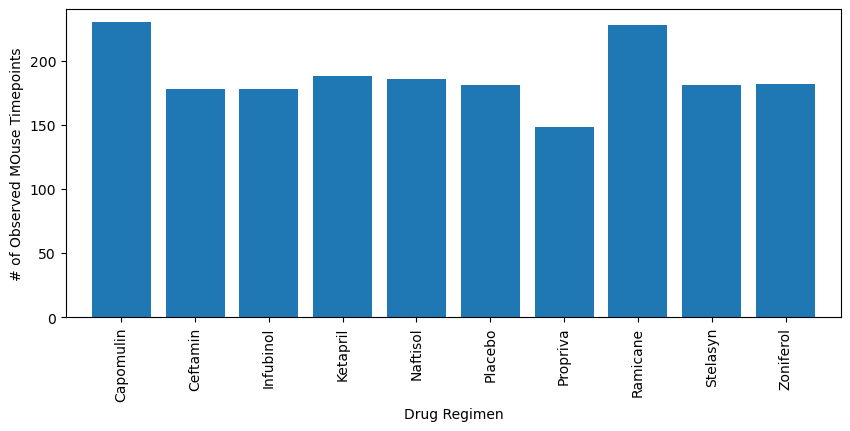

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

# Defining data to be generated
plt.figure(figsize=(10,4))
plt.bar(x_axis, mouse_count, alpha=1, align='center')
plt.xticks(tick_locations, mouse_count.index.values, rotation="vertical")

# Setting x and y limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_count)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed MOuse Timepoints")

plt.show()


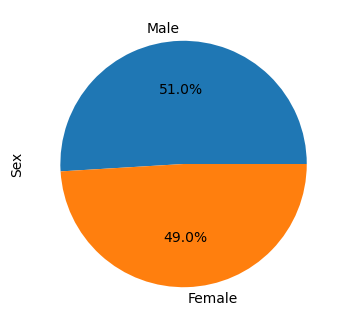

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df['Sex'].value_counts()
gender_count_pie = gender_count.plot(kind="pie", figsize=(10,4),autopct= "%1.1f%%")


#show chart and set layout
plt.show()
plt.tight_layout()


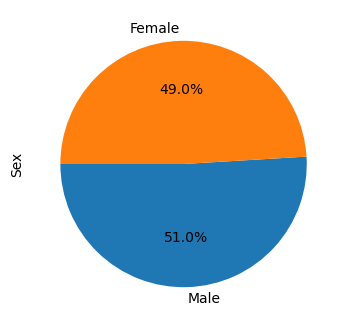

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot_py = gender_count.plot.pie(figsize=(10,4), startangle=180, autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_max_timepoint = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
Ramicane_max_timepoint = Ramicane_df.groupby('Mouse ID')['Timepoint'].max()
Infubinol_max_timepoint = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_max_timepoint = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge = pd.merge(pd.merge(pd.merge(clean_df.merge(capomulin_max_timepoint),Ramicane_max_timepoint),Infubinol_max_timepoint),
                       Ceftamin_max_timepoint)
final_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,15,34.223992,1
1,s185,Capomulin,Female,3,17,15,38.177232,0
2,x401,Capomulin,Female,16,15,15,39.776250,0
3,m601,Capomulin,Male,22,17,15,35.464612,1
4,g791,Ramicane,Male,11,16,15,40.678129,0
...,...,...,...,...,...,...,...,...
6388400,z969,Naftisol,Male,9,30,45,73.867845,4
6388401,z969,Naftisol,Male,9,30,45,73.867845,4
6388402,z969,Naftisol,Male,9,30,45,73.867845,4
6388403,z969,Naftisol,Male,9,30,45,73.867845,4


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatment_list:
    quartiles = (final_merge.loc[(final_merge['Drug Regimen'] == x),'Tumor Volume (mm3)']).quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)   

    # Determine outliers using upper and lower bounds
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {x} treatments is: {lowerq}")
    print(f"The upper quartile of {x} treatments is: {upperq}")
    print(f"The interquartile range of {x} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"------------------------------------------------------------")
    


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.1
The upper quartile of Ramicane treatments is: 38.81
The interquartile range of Ramicane treatments is: 7.71
Values below 19.54 could be outliers.
Values above 50.38 could be outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 62.75
The upper quartile of Infubinol treatments is: 67.69
The interquartile range of Infubinol treatments is: 4.94
Values below 55.34 could be outliers.
Values above 75.1 co

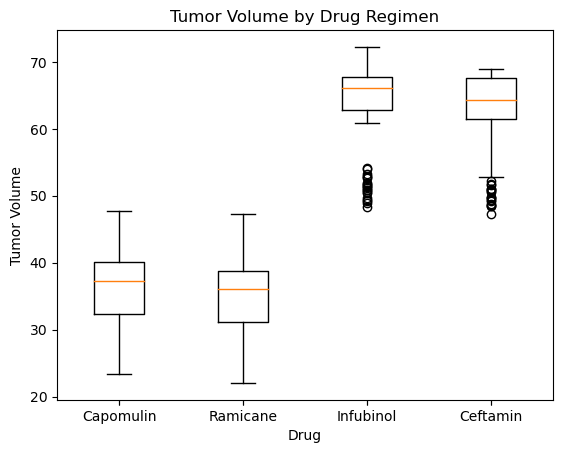

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_list = []
for x in treatment_list:
    plot_list.append(final_merge.loc[(final_merge['Drug Regimen'] == x),'Tumor Volume (mm3)'])
    
plt.xticks([1,2,3,4])
plt.ylabel("Tumor Volume")
plt.xlabel('Drug')
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(plot_list,labels=treatment_list,widths = 0.4, vert=True)
plt.show()


## Line and Scatter Plots

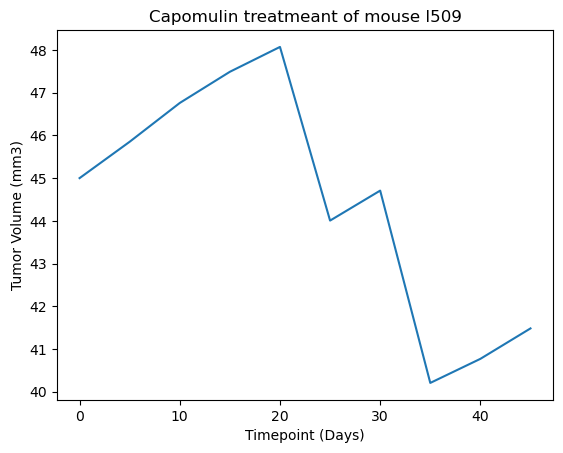

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


C:\Users\15106\AppData\Local\Temp\ipykernel_37324\3835509560.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot_mean = scatter_plot.groupby(["Mouse ID"]).mean()


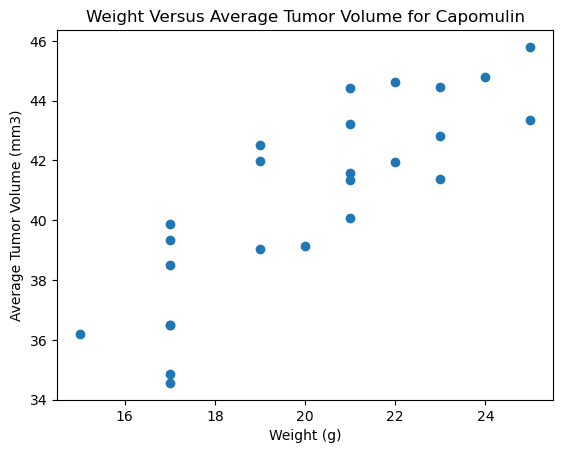

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = Capomulin_df

scatter_plot_mean = scatter_plot.groupby(["Mouse ID"]).mean()

# set x and y value
weight_scatter_plot = scatter_plot_mean["Weight (g)"]
volume_scatter_plot = scatter_plot_mean["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


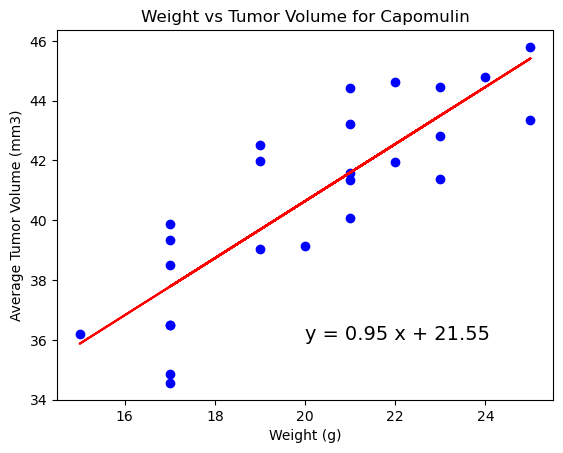

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_scatter_plot,volume_scatter_plot)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(weight_scatter_plot,volume_scatter_plot)
regress_values=weight_scatter_plot* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(weight_scatter_plot,volume_scatter_plot,color='b')
plt.plot(weight_scatter_plot, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()